In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

In [2]:
I = np.array([[[0,0,255],[255,0,0],[0,255,0]],[[255,255,255],[0,0,255],[0,0,0]],[[0,255,0],[255,0,0],[0,0,255]]])

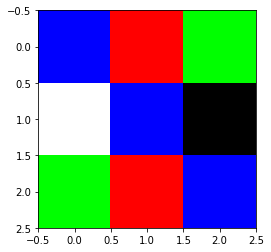

In [3]:
plt.imshow(I)

In [4]:
gray = np.mean(I,axis = 2).astype(np.float64)

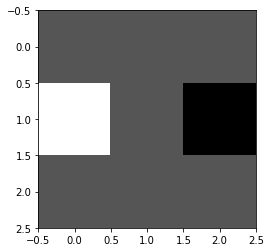

In [5]:
plt.imshow(gray, cmap = 'gray')

In [6]:
room = plt.imread('IMG_20190222_095502922.jpg')

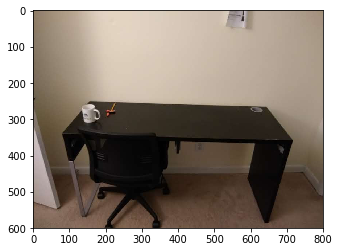

In [7]:
plt.imshow(room)

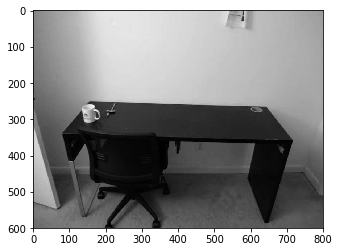

In [8]:
grayroom = np.mean(room, axis = 2)
plt.imshow(grayroom, cmap = 'gray')

In [9]:
newgrayroom = np.column_stack((np.zeros(len(grayroom)),grayroom,np.zeros(len(grayroom))))

In [10]:
newgrayroom = np.row_stack((np.zeros(len(newgrayroom[0,])),newgrayroom,np.zeros(len(newgrayroom[0,]))))

In [11]:
fil = np.array([[0,1,1],[-1,0,1],[-1,-1,0]])

In [12]:
def gaussblur(size = 3, sigma = 1):
    X = np.empty((size,size))
    mu = np.round(np.array([size/2,size/2]))
    for i in range(size):
        for j in range(size):
            pt = np.array([i+1,j+1])
            dist = np.sqrt((pt - mu)@(pt - mu).T)
            X[i,j] = (1/np.sqrt(2*np.pi*(sigma**2)))*np.exp(-(dist**2)/(2*sigma**2))
    return X
        

In [13]:
gaussblur(65, sigma = 2)

array([[9.13336456e-106, 1.87122589e-102, 2.98571274e-099, ...,
        9.13336456e-106, 3.47185635e-109, 1.02782478e-112],
       [1.87122589e-102, 3.83373105e-099, 6.11706994e-096, ...,
        1.87122589e-102, 7.11307147e-106, 2.10578732e-109],
       [2.98571274e-099, 6.11706994e-096, 9.76034682e-093, ...,
        2.98571274e-099, 1.13495587e-102, 3.35997705e-106],
       ...,
       [9.13336456e-106, 1.87122589e-102, 2.98571274e-099, ...,
        9.13336456e-106, 3.47185635e-109, 1.02782478e-112],
       [3.47185635e-109, 7.11307147e-106, 1.13495587e-102, ...,
        3.47185635e-109, 1.31975314e-112, 3.90705961e-116],
       [1.02782478e-112, 2.10578732e-109, 3.35997705e-106, ...,
        1.02782478e-112, 3.90705961e-116, 1.15666441e-119]])

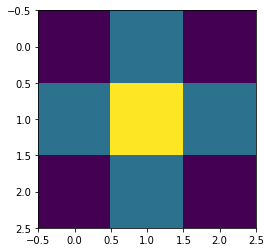

In [14]:
plt.imshow(gaussblur(3,1))

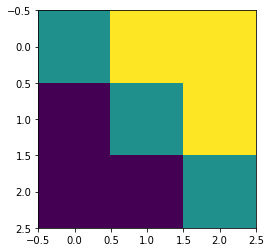

In [15]:
plt.imshow(fil)

In [16]:
def conv(I,F,stride = 1):
    output = np.empty((int((I.shape[0] - F.shape[0])/stride)+1, int((I.shape[1] - F.shape[1])/stride)+1))
    cx = 0
    cy = 0
    for i in range(0, I.shape[0] - F.shape[0]+1,stride):
        cy = 0
        for j in range(0,I.shape[1]-F.shape[1]+1,stride):
            output[cx,cy] = np.sum(I[i:i+F.shape[0],j:j+F.shape[1]]*F)
            cy+=1
        cx += 1
    return output

In [17]:
def maxpool(I,stride = 2):
    output = np.empty(((I.shape[0])//stride, (I.shape[1])//stride))
    cx = 0
    cy = 0
    for i in range(0, I.shape[0],stride):
        cy = 0
        for j in range(0,I.shape[1],stride):
            output[cx,cy] = np.max(I[i:i+2,j:j+2])
            cy+=1
        cx += 1
    return output

In [18]:
def meanpool(I,stride = 2):
    output = np.empty(((I.shape[0])//stride, (I.shape[1])//stride))
    cx = 0
    cy = 0
    for i in range(0, I.shape[0],stride):
        cy = 0
        for j in range(0,I.shape[1],stride):
            output[cx,cy] = np.mean(I[i:i+2,j:j+2])
            cy+=1
        cx += 1
    return output

In [19]:
maxroom =maxpool(newgrayroom)

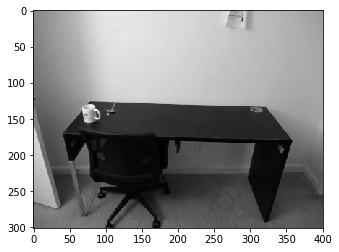

In [20]:
plt.imshow(maxroom, cmap = 'gray')

In [21]:
newergray = conv(newgrayroom,gaussblur(65,20))

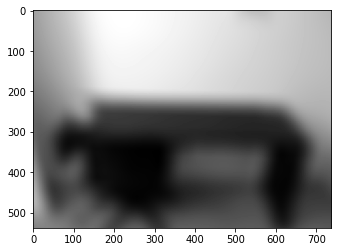

In [22]:
plt.imshow(newergray, cmap = 'gray')

In [23]:
newgrayfil = conv(newgrayroom, fil)

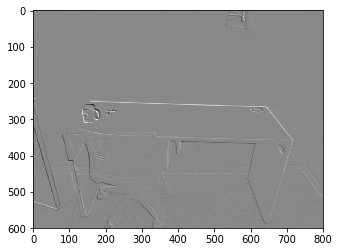

In [24]:
plt.imshow(newgrayfil,cmap = 'gray')

In [25]:
def padder(I,padrows = 2, padcols = 2):
    paddedcols = np.hstack((np.zeros((I.shape[0],padcols)), I,np.zeros((I.shape[0], padcols))))
    paddedrows = np.vstack((np.zeros((padrows,paddedcols.shape[1])),paddedcols,np.zeros((padrows,paddedcols.shape[1]))))
    return paddedrows

In [26]:
def validconv(image, fil, stride):
    p1 = (image.shape[0]*stride - stride - image.shape[0]+fil.shape[0])/2
    p2 = (image.shape[1]*stride - stride - image.shape[1]+fil.shape[1])/2
    newimage = padder(image, int(np.round(p1)), int(np.round(p2)))
    return conv(newimage,fil)

In [27]:
fil = np.array([[-1,0,0],[0,-1,0],[0,0,-1]])

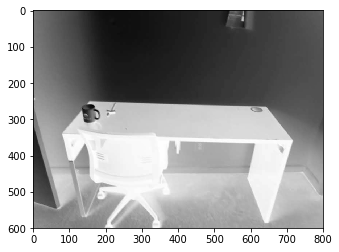

In [28]:
plt.imshow(validconv(grayroom,fil , 1), cmap = 'gray')

In [29]:
validconv(grayroom, fil, 1).shape

(600, 800)

In [30]:
newgrayroom.shape

(602, 802)

In [31]:
def padder(I,padrows = 2, padcols = 2):
    paddedcols = np.hstack((np.zeros((I.shape[0],padcols)), I,np.zeros((I.shape[0], padcols))))
    paddedrows = np.vstack((np.zeros((padrows,paddedcols.shape[1])),paddedcols,np.zeros((padrows,paddedcols.shape[1]))))
    return paddedrows
def conv3(I,F,stride = 1):
    output = np.empty((int((I.shape[0] - F.shape[0])/stride)+1, int((I.shape[1] - F.shape[1])/stride)+1))
    cx = 0
    cy = 0
    for i in range(0, I.shape[0] - F.shape[0]+1,stride):
        cy = 0
        for j in range(0,I.shape[1]-F.shape[1]+1,stride):
            output[cx,cy] = np.sum(I[i:i+F.shape[0],j:j+F.shape[1],:]*F)
            cy+=1
        cx += 1
    return output

In [32]:
room0 = room[:,:,0]
room1 = room[:,:,1]
room2 = room[:,:,2]

In [33]:
newroom0 = padder(room0,1,1)
newroom1 = padder(room1,1,1)
newroom2 = padder(room2,1,1)

In [34]:
newestroom = np.dstack((newroom0,newroom1,newroom2))

In [35]:
newfil = np.array([[[-1,-1,0],[-1,-1,0],[-1,0,1]],[[0,0,0],[-1,-1,0],[1,-1,0]],[[-1,-1,0],[-1,-1,0],[-1,0,1]]])

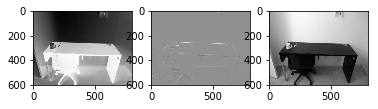

In [36]:
plt.subplot(1,3,1)
plt.imshow(conv3(newestroom, newfil), cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(conv3(newestroom,np.array([[[1,0,0],[1,0,0],[1,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[-1,0,0],[-1,0,0],[-1,0,0]]])),cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(conv3(newestroom,np.array([[[1,0,0],[0,0,0],[0,0,0]],[[0,0,0],[1,0,0],[0,0,0]],[[0,0,0],[0,0,0],[1,0,0]]])),cmap = 'gray')

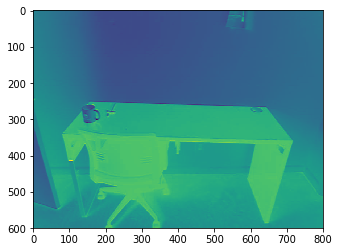

In [37]:
newfil = np.array([[[0,-1,0],[0,0,-1],[-1,0,0]],[[0,0,-1],[-1,0,0],[-1,0,0]],[[1,0,0],[0,1,0],[0,0,1]]])
plt.imshow(conv3(newestroom, newfil))

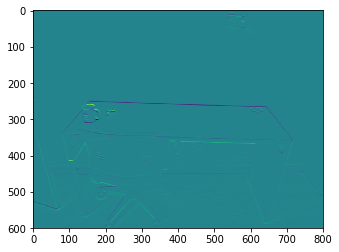

In [38]:
newfil = np.array([[[0,-1,0],[0,0,-1],[-1,0,0]],[[0,0,0],[0,0,0],[0,0,0]],[[1,0,0],[0,1,0],[0,0,1]]])
plt.imshow(conv3(newestroom, newfil))

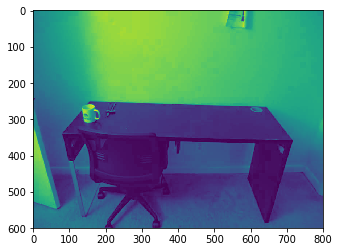

In [39]:
plt.imshow(room[:,:,2])

In [66]:
def dist(X,mu, sigma):
    d = sp.multivariate_normal.pdf(X, mu, sigma)
    return d

In [41]:
comic = plt.imread('comic.jpg')

In [42]:
X = comic.reshape(comic.shape[0]*comic.shape[1],comic.shape[2])

In [43]:
X

array([[255, 252, 255],
       [255, 251, 255],
       [255, 250, 255],
       ...,
       [252, 253, 248],
       [252, 253, 248],
       [251, 252, 247]], dtype=uint8)

In [79]:
M = np.row_stack((np.array([50,50,50]),np.array([150,150,150]),np.array([0,0,0])))
M
sigma0 = np.eye(3)
sigma1 = np.eye(3)
sigma2 = np.eye(3)
dist(X[25,],M[0,], sigma0)

0.0

In [80]:
for i in range(5):
    print(i)
    D0 = np.empty((len(X),1))
    for i in range(len(X)):
        D0[i,0] = np.array(dist(X[i,], M[0,], sigma0), dtype = float)
    D1 = np.empty((len(X),1))
    for i in range(len(X)):
        D1[i,0] = dist(X[i,], M[1,], sigma1)
    D2 = np.empty((len(X),1))
    for i in range(len(X)):
        D2[i,0] = dist(X[i,], M[2,], sigma2)
    D = np.column_stack((D0,D1,D2))
    labels = np.argmin(D, axis = 1)
    M0 = np.mean(X[np.where(labels==0),][0], axis = 0)
    sigma0 = np.cov(X[np.where(labels==0),][0].T)
    M1 = np.mean(X[np.where(labels == 1),][0], axis = 0)
    sigma1 = np.cov(X[np.where(labels==1),][0].T)
    M2 = np.mean(X[np.where(labels == 2),][0], axis = 0)
    sigma2 = np.cov(X[np.where(labels==2),][0].T)
    M = np.row_stack((M0,M1, M2))

0


/home/donald/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Degrees of freedom <= 0 for slice
/home/donald/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/donald/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


1


KeyboardInterrupt: 

In [75]:
len(X[np.where(labels==0),][0])

269875

In [ ]:
M

In [ ]:
newcomic = np.empty((comic.shape[0],comic.shape[1],comic.shape[2]))


In [ ]:
for i in range(comic.shape[0]):
    for j in range(comic.shape[1]):
        r = dist(comic[i,j,:], M[0,])
        l = dist(comic[i,j,:], M[1,])
        k = dist(comic[i,j,:], M[2,])
        q = dist(comic[i,j,:], M[3,])
        t = dist(comic[i,j,:], M[4,])
        if r < l and r<k and r < q and r < t:
            newcomic[i,j,:] = M[0,]
        if l < r and l<k and l < q and l < t:
            newcomic[i,j,:] = M[1,]
        if k < r and k < l and k < q and k <t:
            newcomic[i,j,:] = M[2,]
        if q < r and q < k and q < l and q < t:
            newcomic[i,j,:] = M[3,]
        if t<r and t < l and t < k and t < q:
            newcomic[i,j,:] = M[4,]

In [ ]:
newestcomic = np.array(newcomic, dtype = int)

In [ ]:
plt.subplot(1,2,1)
plt.imshow(newestcomic)
plt.subplot(1,2,2)
plt.imshow(comic)